# SPAM SMS DETECTION MODEL

### 1. Load the Dataset

In [161]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re
import string
import zipfile

In [162]:
import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")

In [163]:
# Unzip the files
with zipfile.ZipFile(r"C:\Users\shrav\Downloads\archive (5).zip") as zip_ref:
    zip_ref.extractall('/mnt/data/')
# Load the dataset
data = pd.read_csv(r"C:\Users\shrav\Downloads\archive (5).zip", encoding='latin-1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


### 2. Data Cleaning

In [164]:
data.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [165]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [166]:
data = data[['v1','v2']]
# Rename columns for better readability
data.columns = ['label', 'message']
data

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### 3. EDA and Data Visualization

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [168]:
data.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


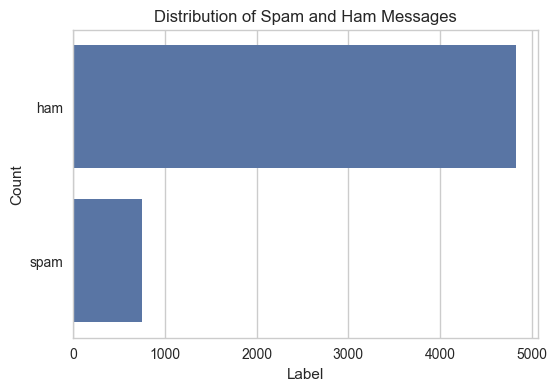

In [169]:
# Plot the distribution of spam and ham messages
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(data['label'])
plt.title('Distribution of Spam and Ham Messages')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [170]:
data['messagelength'] = data['message'].apply(len)

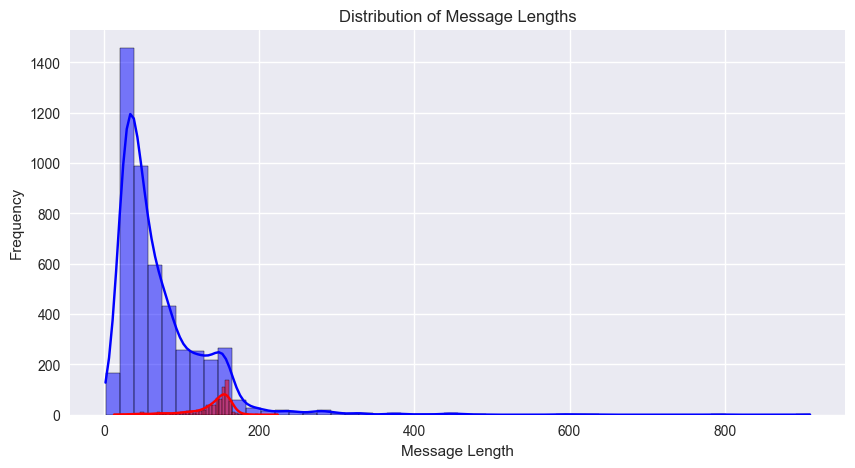

In [171]:
# Plotting Distribution of message lengths
plt.figure(figsize=(10, 5))
plt.style.use("seaborn-v0_8")
sns.histplot(data[data['label'] == 'ham']['messagelength'], bins=50, color='blue', label='Ham', kde=True)
sns.histplot(data[data['label'] == 'spam']['messagelength'], bins=50, color='red', label='Spam', kde=True)
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

### 4. Preprocess the Data

1. Data preprocessing

In [172]:
# Preprocess the data
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

In [173]:
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove digits
    return text

data['message'] = data['message'].apply(preprocess_text)

2. Feature Extraction using TF-IDF

In [174]:
# Feature extraction using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=3000)
X = tfidf.fit_transform(data['message']).toarray()
y = data['label']

### 5. Split the Data into Training and Test Sets

In [175]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

### 6. Evaluate Model

In [176]:
# Hyperparameter Tuning for Logistic Regression
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear']
}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100], 'solver': ['liblinear']},
             scoring='accuracy')

In [177]:
# Best model
best_model = grid_search.best_estimator_

In [178]:
# Make predictions
y_pred = best_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [179]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['ham', 'spam'])

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Best Parameters: {'C': 100, 'solver': 'liblinear'}
Accuracy: 0.9766816143497757
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.98      0.85      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



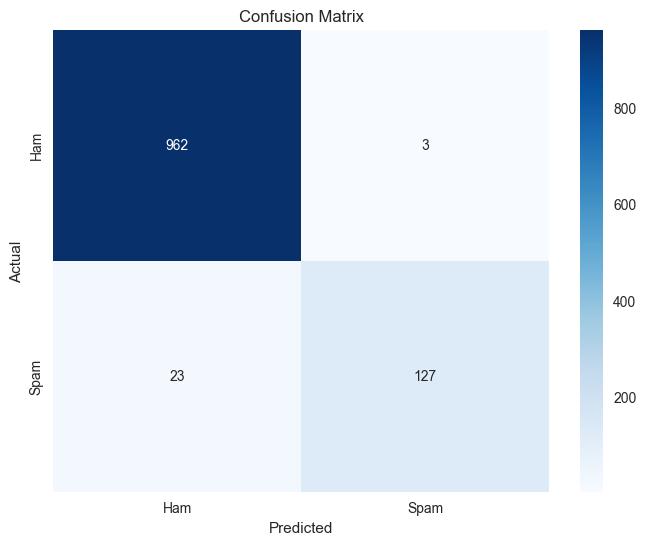

In [180]:
# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()